<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## Help Yelp

---

In this project you will be investigating a small version of the [Yelp challenge dataset](https://www.yelp.com/dataset_challenge). You'll practice using classification algorithms, cross-validation, gridsearching – all that good stuff.



In [1]:
pwd

u'/home/dsi-student/Desktop/DSI-SF-2-DanielEMoreno/code/projects/project-05'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV

---

### The data

There are 5 individual .csv files that have the information, zipped into .7z format like with the SF data last project. The dataset is located in your datasets folder:

    DSI-SF-2/datasets/yelp_arizona_data.7z

The columns in each are:

    businesses_small_parsed.csv
        business_id: unique business identifier
        name: name of the business
        review_count: number of reviews per business
        city: city business resides in
        stars: average rating
        categories: categories the business falls into (can be one or multiple)
        latitude
        longitude
        neighborhoods: neighborhoods business belongs to
        variable: "property" of the business (a tag)
        value: True/False for the property
        
    reviews_small_nlp_parsed.csv
        user_id: unique user identifier
        review_id: unique review identifier
        votes.cool: how many thought the review was "cool"
        business_id: unique business id the review is for
        votes.funny: how many thought the review was funny
        stars: rating given
        date: date of review
        votes.useful: how many thought the review was useful
        ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review
        
    users_small_parsed.csv
        yelping_since: signup date
        compliments.plain: # of compliments "plain"
        review_count: # of reviews:
        compliments.cute: total # of compliments "cute"
        compliments.writer: # of compliments "writer"
        compliments.note: # of compliments "note" (not sure what this is)
        compliments.hot: # of compliments "hot" (?)
        compliments.cool: # of compliments "cool"
        compliments.profile: # of compliments "profile"
        average_stars: average rating
        compliments.more: # of compliments "more"
        elite: years considered "elite"
        name: user's name
        user_id: unique user id
        votes.cool: # of votes "cool"
        compliments.list: # of compliments "list"
        votes.funny: # of compliments "funny"
        compliments.photos: # of compliments "photos"
        compliments.funny: # of compliments "funny"
        votes.useful: # of votes "useful"
       
    checkins_small_parsed.csv
        business_id: unique business identifier
        variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
        value: # of checkins at that time
    
    tips_small_nlp_parsed.csv
        user_id: unique user identifier
        business_id: unique business identifier
        likes: likes that the tip has
        date: date of tip
        ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. I'm not sure whether the compliments or votes are _by_ the user or _for_ the user.

---

If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

    Phoenix
    Surprise
    Las Vegas
    Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because I thought the mix of them was funny:

    Airports
    Breakfast & Brunch
    Bubble Tea
    Burgers
    Bars
    Bakeries
    Breweries
    Cafes
    Candy Stores
    Comedy Clubs
    Courthouses
    Dance Clubs
    Fast Food
    Museums
    Tattoo
    Vape Shops
    Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

In [3]:
business = "yelp_arizona_data/businesses_small_parsed.csv"
checkins = "yelp_arizona_data/checkins_small_parsed.csv"
reviews = "yelp_arizona_data/reviews_small_nlp_parsed.csv"
tips = "yelp_arizona_data/tips_small_nlp_parsed.csv"
users = "yelp_arizona_data/users_small_parsed.csv"

business_df = pd.read_csv(business)
checkins_df = pd.read_csv(checkins)
reviews_df = pd.read_csv(reviews)
tips_df = pd.read_csv(tips)
users_df = pd.read_csv(users)


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

In [4]:
business_df.head()

#Map the categorical target
business_df['target'] = business_df['city'].map(lambda x: 1 if x == 'Las Vegas' else 0)

business_df.drop('city', axis=1)

,business_id,name,review_count,stars,categories,latitude,longitude,neighborhoods,variable,value,target
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...",33.448399,-112.071702,[],attributes.Ambience.divey,False,0
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,3.0,"['Bars', 'Nightlife', 'Dance Clubs']",33.455885,-112.074177,[],attributes.Ambience.divey,False,0
2,e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,238,3.5,"['Cafes', 'Mexican', 'Tex-Mex', 'Restaurants']",33.452154,-112.068620,[],attributes.Ambience.divey,False,0
3,neGAQFkBNI8-rpPBLBzNkw,Taco Bell,10,4.0,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",33.465440,-112.069090,[],attributes.Ambience.divey,False,0
4,45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,205,3.5,"['Bars', 'Restaurants', 'American (Traditional...",33.448465,-112.071257,[],attributes.Ambience.divey,False,0
5,P7wKlbSRsoRrfH3DFOY08A,International House of Pancakes,57,3.0,"['Breakfast & Brunch', 'Restaurants']",33.475583,-112.074115,[],attributes.Ambience.divey,False,0
6,j8nyAaN_w5t6wYv-ni23sg,Coach & Willies,73,3.0,"['Nightlife', 'Bars', 'American (New)', 'Sport...",33.443909,-112.070122,[],attributes.Ambience.divey,False,0
7,qsWxbgQwuomXvMseg23DGg,Hooters,113,2.5,"['Bars', 'American (Traditional)', 'Sports Bar...",33.452335,-112.069614,[],attributes.Ambience.divey,False,0
8,9BH18avE46LlHMvJn67MaA,The Downtown Deli,57,4.0,"['Breakfast & Brunch', 'Delis', 'Sandwiches', ...",33.449952,-112.074051,[],attributes.Ambience.divey,False,0
9,tK91rSBc8SWa3XEQwe8D4A,Downtown,11,2.5,"['Nightlife', 'Dance Clubs']",33.455885,-112.074177,[],attributes.Ambience.divey,False,0


In [5]:
business_pv = business_df.pivot_table(index=['business_id', 'categories', 'target'], columns='variable',
                                values='value', aggfunc=np.max, fill_value=False).reset_index()
#pivot table to see all variables specific to each business_id


In [6]:
business_pv.head()

variable,business_id,categories,target,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,attributes.Ambience.casual,attributes.Ambience.classy,attributes.Ambience.divey,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,"['Fast Food', 'Sandwiches', 'Restaurants']",1,True,False,False,none,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,-0HGqwlfw3I8nkJyMHxAsQ,"['Burgers', 'Fast Food', 'Restaurants']",0,True,False,False,none,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0VK5Z1BfUHUYq4PoBYNLw,"['Bars', 'Nightlife', 'Lounges']",1,True,False,False,full_bar,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,-0bUDim5OGuv8R0Qqq6J4A,"['Bakeries', 'Food', 'Breakfast & Brunch', 'Re...",0,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-1bOb2izeJBZjHC7NWxiPA,"['Breakfast & Brunch', 'Cafes', 'American (Tra...",0,True,False,False,none,True,False,False,...,06:30,14:30,06:30,14:30,06:30,14:30,06:30,14:30,06:30,True


In [7]:

#cleaning the values of the business table, some were strings that needed to be changed to actual boolean values

business_pv['attributes.Accepts Credit Cards'] = business_pv['attributes.Accepts Credit Cards'].map(lambda x: True if x==True else False)
business_pv['attributes.Alcohol'] = business_pv['attributes.Alcohol'].map(lambda x: True if (x=='full_bar')|(x=='beer_and_wine') else False)
business_pv['attributes.Ambience.touristy'] = business_pv['attributes.Ambience.touristy'].map(lambda x: True if x=='True' else False)
business_pv['attributes.Ambience.upscale'] = business_pv['attributes.Ambience.upscale'].map(lambda x: True if x=='True' else False)
business_pv['attributes.Good For Dancing'] = business_pv['attributes.Good For Dancing'].map(lambda x: True if x=='True' else False)
business_pv['attributes.Good For Groups'] = business_pv['attributes.Good For Groups'].map(lambda x: True if x=='True' else False)
business_pv['attributes.Good For.latenight'] = business_pv['attributes.Good For.latenight'].map(lambda x: True if x=='True' else False)
business_pv['attributes.Open 24 Hours'] = business_pv['attributes.Open 24 Hours'].map(lambda x: True if x=='True' else False)


In [8]:
desired_attributes=['attributes.Accepts Credit Cards', 'attributes.Alcohol', 'attributes.Ambience.touristy',
                    'attributes.Ambience.upscale', 'attributes.Good For Dancing', 'attributes.Good For Groups',
                    'attributes.Good For.latenight', 'attributes.Open 24 Hours']

X = business_pv[desired_attributes].values
y = business_pv['target'].values

In [9]:
lrg = LogisticRegression()

search_params = {
    'penalty':['l1', 'l2']
}

lrg_gs = GridSearchCV(lrg, search_params, cv=5, verbose=True)
lrg_gs.fit(X,y)


print lrg_gs.best_params_
print lrg_gs.best_score_

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'penalty': 'l1'}
0.621974830591


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.5s finished


In [10]:
cv_indices = StratifiedKFold(y, n_folds=10)

logreg = LogisticRegression()

lr_scores = []

for train_inds, test_inds in cv_indices:
    
    Xtr, ytr = X[train_inds, :], y[train_inds]
    Xte, yte = X[test_inds, :], y[test_inds]
    
    model = logreg.fit(Xtr, ytr)
    lr_scores.append(logreg.score(Xte, yte))
    
print "mean cross val score: ", np.mean(lr_scores)
print "Cross val scores: ", lr_scores

mean cross val score:  0.621975412617
Cross val scores:  [0.62077294685990336, 0.62077294685990336, 0.62227602905569013, 0.62227602905569013, 0.62227602905569013, 0.62227602905569013, 0.62227602905569013, 0.62227602905569013, 0.62227602905569013, 0.62227602905569013]


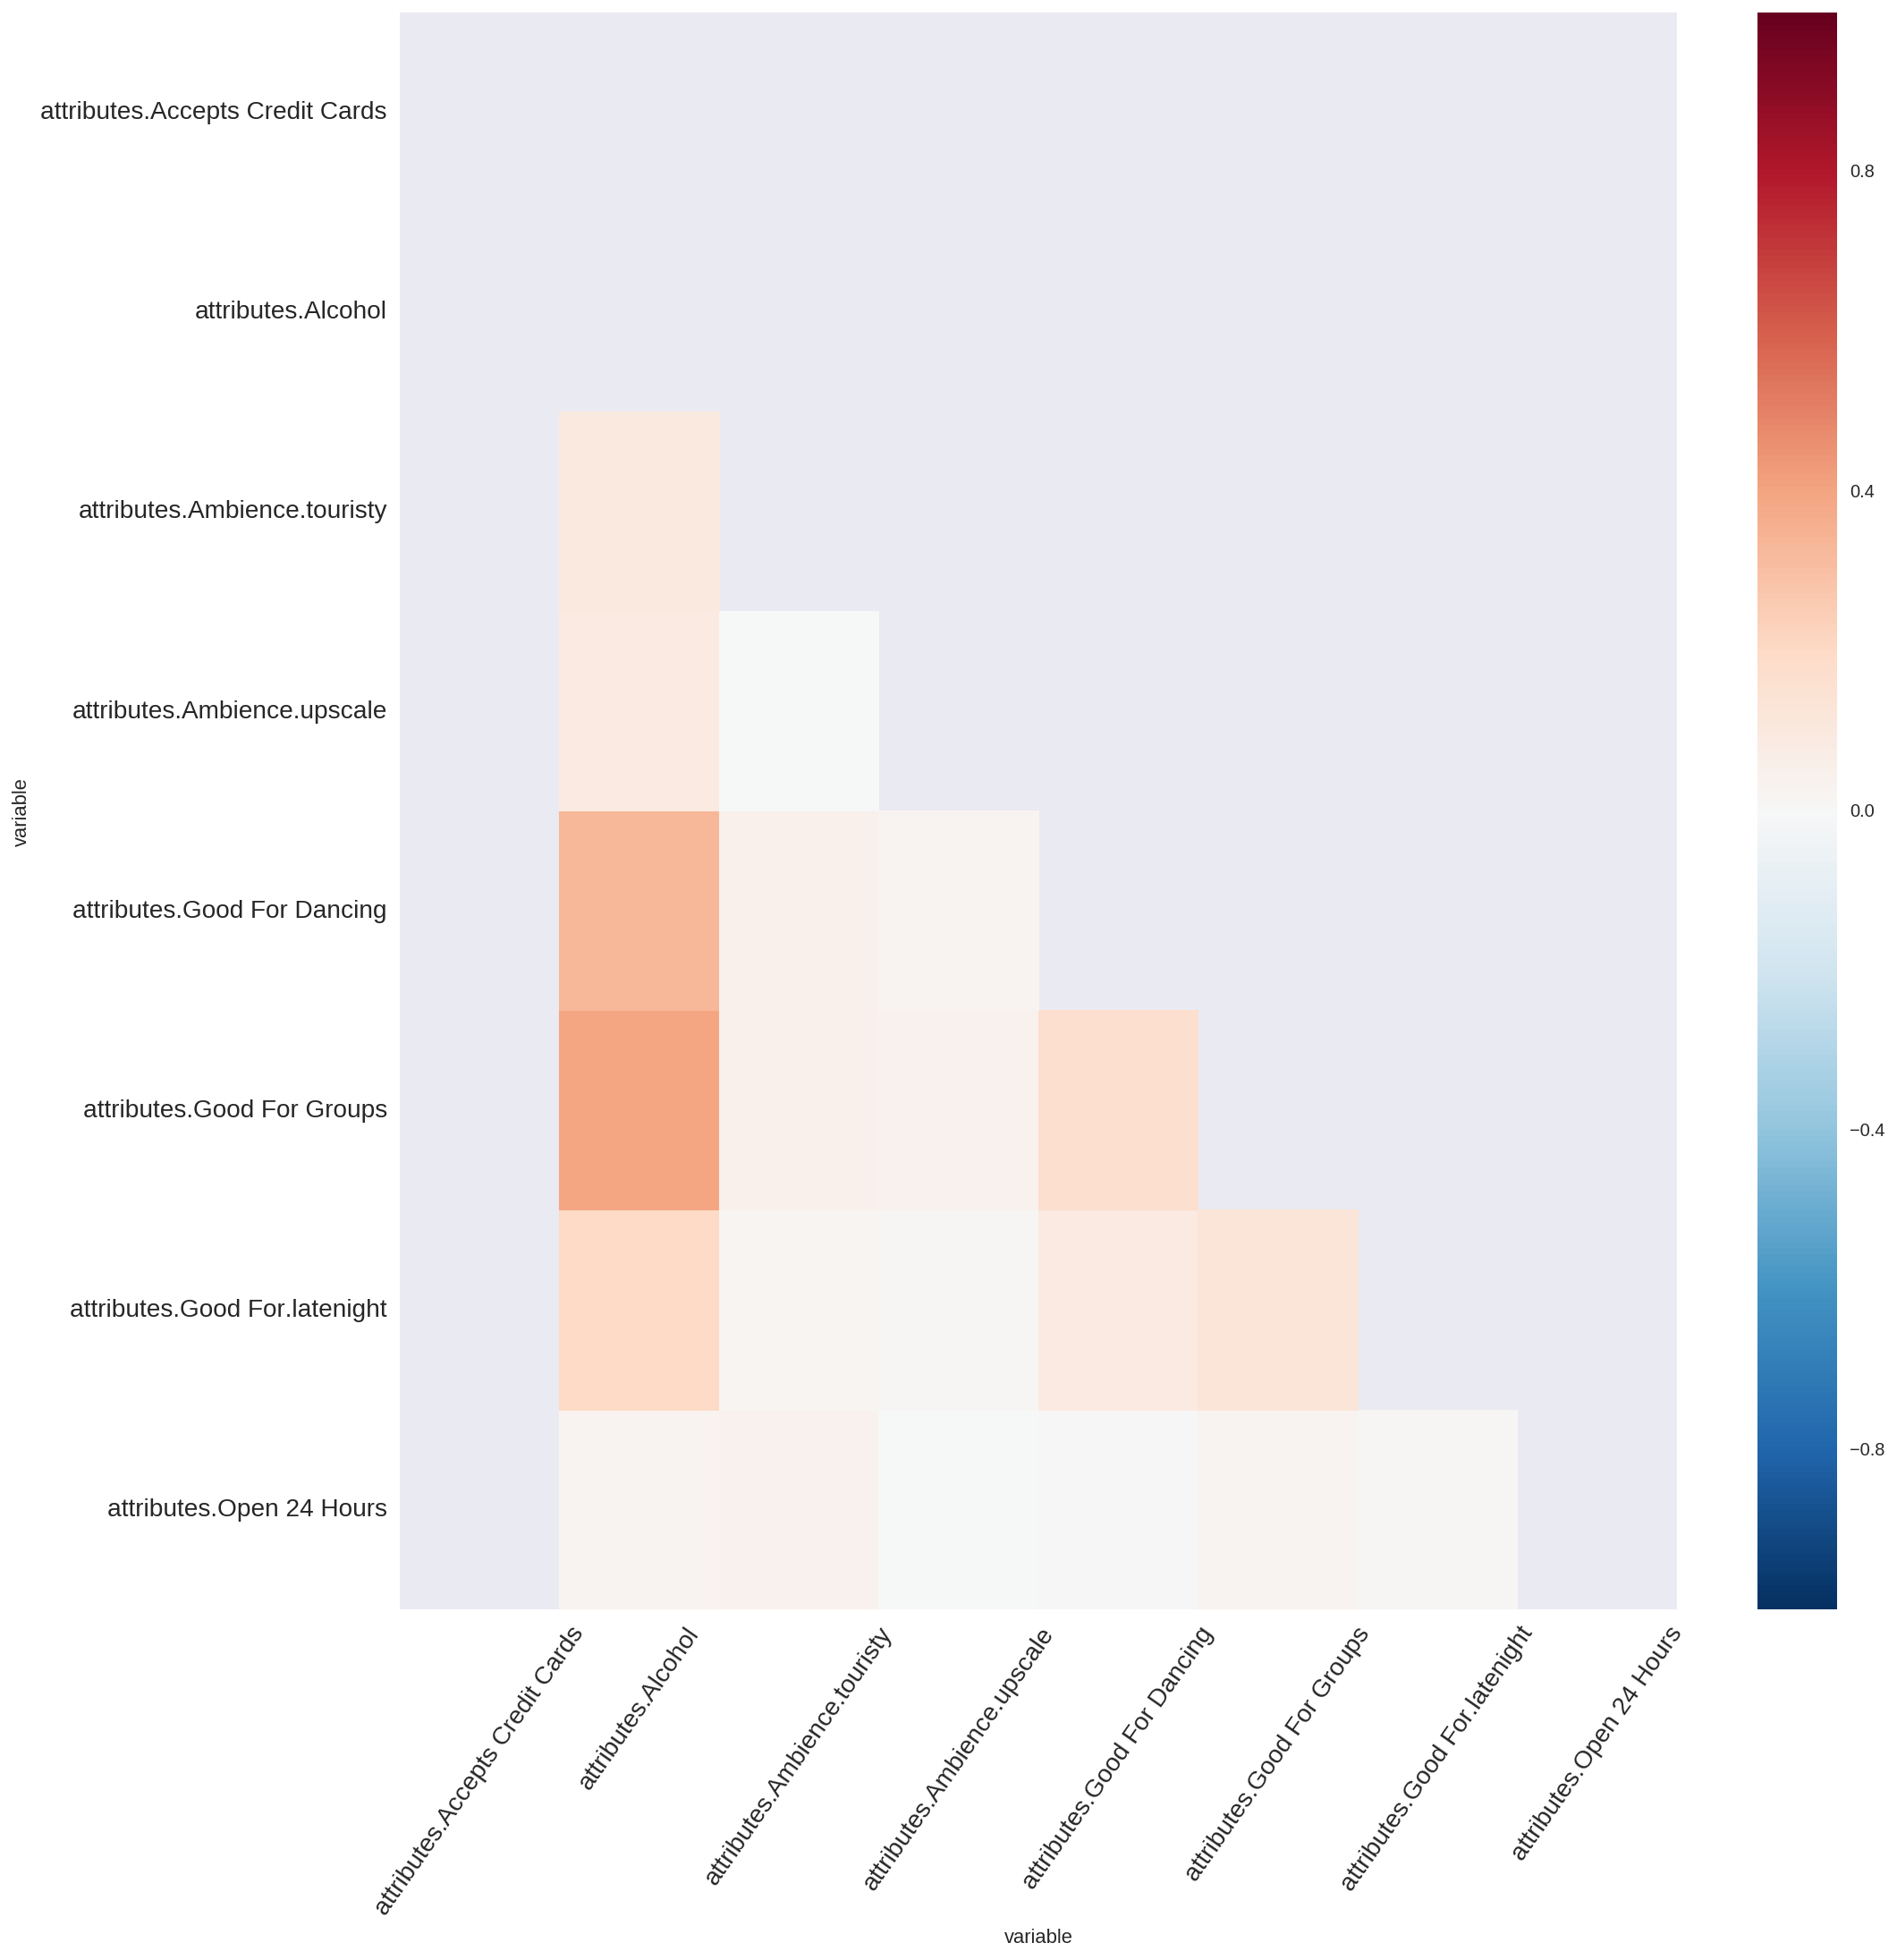

In [11]:
corrs = business_pv[[col for col in business_pv.columns if col != 'target']].corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(16,16))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=55)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [12]:
checkins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214299 entries, 0 to 214298
Data columns (total 3 columns):
business_id    214299 non-null object
variable       214299 non-null object
value          214299 non-null float64
dtypes: float64(1), object(2)
memory usage: 4.9+ MB


In [13]:
len(tips_df.columns)

104

In [14]:
users_df.head()


,yelping_since,compliments.plain,review_count,compliments.cute,compliments.writer,fans,compliments.note,compliments.hot,compliments.cool,compliments.profile,...,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
0,2004-10,959.0,1274,206.0,327.0,1179,611.0,1094.0,1642.0,116.0,...,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199
1,2004-10,89.0,442,23.0,24.0,100,83.0,101.0,145.0,9.0,...,19.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,4U9kSBLuBDU391x6bxU-YA,732,4.0,908,24.0,120.0,1483
2,2004-10,2.0,66,2.0,2.0,4,1.0,1.0,1.0,NaN,...,1.0,[2005],Katherine,SIBCL7HBkrP4llolm4SC2A,13,NaN,11,NaN,NaN,34
3,2004-10,5.0,101,1.0,3.0,7,3.0,5.0,4.0,1.0,...,2.0,[],Nader,UTS9XcT14H2ZscRIf0MYHQ,49,NaN,53,1.0,8.0,243
4,2004-10,104.0,983,82.0,17.0,78,85.0,265.0,212.0,9.0,...,16.0,"[2005, 2006, 2007, 2008, 2010, 2011, 2012]",Helen,ZWOj6LmzwGvMDh-A85EOtA,1928,3.0,1109,57.0,70.0,2404


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [15]:
reviews_df.head()

,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sEWeeq41k4ohBz4jS_iGRw,tOhOHUAS7XJch7a_HW5Csw,3,EmzaQR5hQlF0WIl24NxAZA,12,2,2008-04-21,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1AqEqmmVHgYCuzcMrF4h2g,2aGafu-x7onydGoDgDfeQQ,0,EmzaQR5hQlF0WIl24NxAZA,2,2,2009-11-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pv82zTlB5Txsu2Pusu__FA,CY4SWiYcUZTWS_T_cGaGPA,4,EmzaQR5hQlF0WIl24NxAZA,9,2,2010-08-16,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,VCKytaG-_YkxmQosH4E0jw,0,EmzaQR5hQlF0WIl24NxAZA,1,4,2010-12-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
foodattributes = ['bar food', 'eggs benedict', 'bloody mary', 'beer selection', 'fast food',
                  'fish chips', 'food amazing', 'food came', 'food delicious', 'food good',
                  'food great', 'food just', 'great food', 'good food', 'hash browns', 'ice cream',
                  'mac cheese', 'mashed potatoes', 'medium rare', 'onion rings', 'potato fries',
                  'quality food', 'sweet potato']

serviceattributes = ['bottle service', 'customer service', 'food service', 'good service',
                     'service food', 'service great', 'service excellent', 'service friendly',
                     'service good', 'staff friendly', 'super friendly']

allatt = foodattributes + serviceattributes

# return the sum specific to the attribute denoted by the function name, else return nan
def parse_df_row_service(row):
    if sum(row[foodattributes]) < sum(row[serviceattributes]):
        return sum(row[serviceattributes])
    elif sum(row[foodattributes]) == sum(row[serviceattributes]):
        return np.nan
    else:
        return np.nan
    
def parse_df_row_food(row):
    if sum(row[foodattributes]) > sum(row[serviceattributes]):
        return sum(row[foodattributes])
    elif sum(row[foodattributes]) == sum(row[serviceattributes]):
        return np.nan
    else:
        return np.nan
    

#using a fraction on the dataframe was the only way to get this cell to run without a memory error    
copy = reviews_df.sample(frac=.10).copy()
review_food = copy.copy()
review_service = copy.copy()

review_service['foodorservice'] = review_service.apply(parse_df_row_service, axis=1)
review_food['foosorservice'] = review_food.apply(parse_df_row_food, axis = 1)

In [17]:
review_food['foosorservice'].value_counts(dropna=False)

NaN     25810
 1.0     4288
 2.0     1526
 3.0      412
 4.0      132
 5.0       41
 6.0       16
 7.0       10
 9.0        3
 8.0        2
Name: foosorservice, dtype: int64

In [18]:
review_service['foodorservice'].value_counts(dropna=False)

NaN     28665
 1.0     2936
 2.0      552
 3.0       70
 4.0       11
 5.0        4
 9.0        1
 7.0        1
Name: foodorservice, dtype: int64

In [19]:
review_food.dropna(inplace=True)
review_service.dropna(inplace=True)

In [20]:
y = review_service['stars'].values
X = review_service[allatt]

lrg = LinearRegression()

lrmodel = lrg.fit(X, y)

print "Service-Oriented review score: \n", lrmodel.score
service_coefs = zip(review_service[allatt].columns, lrmodel.coef_)
print "Service-oriented review coefs: \n", service_coefs

search_parameters = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

lrg_gs = GridSearchCV(lrg, search_parameters, cv=10, verbose=True)
model = lrg_gs.fit(X,y)


print 'gridsearch best params: \n', model.best_params_
print 'gridsearch best score: \n', model.best_score_

Service-Oriented review score: 
<bound method LinearRegression.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>
Service-oriented review coefs: 
[('bar food', -0.17877217603074552), ('eggs benedict', 0.83905718414657982), ('bloody mary', -0.27189958814570581), ('beer selection', 0.1049199168413249), ('fast food', -0.35390739980473823), ('fish chips', -0.16934404753586449), ('food amazing', 1.7489930338757071), ('food came', -0.12432306087787881), ('food delicious', 0.048969850955068964), ('food good', -0.070350315412101128), ('food great', 0.18627622763339824), ('food just', -0.92720313829640899), ('great food', -0.27517969897008798), ('good food', 0.34158980200273203), ('hash browns', -1.4016565685892601e-15), ('ice cream', -0.40331191983975501), ('mac cheese', 0.32629462902892925), ('mashed potatoes', 5.5511151231257827e-17), ('medium rare', 0.17795314053445105), ('onion rings', 0.62301921961738094), ('potato fries', -1.7347234759768071e-16), ('qu

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


In [21]:
y = review_food['stars'].values
X = review_food[allatt]

lrg = LinearRegression()

lrmodel = lrg.fit(X, y)

food_coefs = zip(review_food[allatt].columns, lrmodel.coef_)
print "food-oriented review coefs: \n", food_coefs
print "Service-Oriented review score: \n", lrmodel.score

search_params = {
    'normalize':[True, False],
    'fit_intercept':[True, False]
}

lrg_gs = GridSearchCV(lrg, search_params, cv=10, verbose=True)
model = lrg_gs.fit(X,y)


print 'gridsearch best params:', model.best_params_
print 'gridsearch best score:', model.best_score_

food-oriented review coefs: 
[('bar food', -0.20351074419420176), ('eggs benedict', 0.0095368060566488611), ('bloody mary', 0.11410266309637696), ('beer selection', 0.0070928442445860329), ('fast food', -0.18303296110396586), ('fish chips', -0.15020722310816431), ('food amazing', 0.65104919489895052), ('food came', -0.50187856697810418), ('food delicious', 0.4501985939721056), ('food good', -0.17916918809932142), ('food great', 0.29055629901170466), ('food just', -0.61205782821671528), ('great food', 0.39940245295575677), ('good food', -0.018784763473469135), ('hash browns', -0.12810608300885634), ('ice cream', 0.079082844796956014), ('mac cheese', -0.042614621035074074), ('mashed potatoes', 0.040799114190454872), ('medium rare', -0.2344135413960497), ('onion rings', -0.1161645881547014), ('potato fries', -0.12051310711209084), ('quality food', -0.2071545392150422), ('sweet potato', 0.16928723450385474), ('bottle service', 0.34711979609229615), ('customer service', -0.26353841809574086

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [22]:
users_df.columns

Index([u'yelping_since', u'compliments.plain', u'review_count',
       u'compliments.cute', u'compliments.writer', u'fans',
       u'compliments.note', u'compliments.hot', u'compliments.cool',
       u'compliments.profile', u'average_stars', u'compliments.more', u'elite',
       u'name', u'user_id', u'votes.cool', u'compliments.list', u'votes.funny',
       u'compliments.photos', u'compliments.funny', u'votes.useful'],
      dtype='object')

In [23]:
test = users_df['elite'].ix[0, 'elite']

In [24]:
test

'[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]'

In [25]:
def clean_elite_col(item):
    item = eval(item)  
    return  item

In [26]:
test = clean_elite_col(test)
test

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [27]:

boolusers = users_df.copy()
boolusers['elite'] = users_df['elite'].apply(lambda x: 0 if len(x)==2 else 1)

In [28]:
boolusers.isnull().sum()

yelping_since               0
compliments.plain       97172
review_count                0
compliments.cute       131073
compliments.writer     110984
fans                        0
compliments.note       104334
compliments.hot        112458
compliments.cool       103137
compliments.profile    131838
average_stars               0
compliments.more       119140
elite                       0
name                        0
user_id                     0
votes.cool                  0
compliments.list       137026
votes.funny                 0
compliments.photos     125447
compliments.funny      113594
votes.useful                0
dtype: int64

In [29]:
tips_df.head()

,user_id,business_id,likes,date,24 hours,amazing food,animal style,awesome food,awesome place,awesome service,...,service good,service great,slow service,staff friendly,staff great,steak eggs,super friendly,sweet potato,velvet pancakes,worth wait
0,trdsekNRD-gIs50EBrScwA,EmzaQR5hQlF0WIl24NxAZA,0,2012-02-27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,liIQCDzDTnvXc7X8twBIjg,EmzaQR5hQlF0WIl24NxAZA,0,2013-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,iW1ltQqq4GWAErobLiOv9w,EmzaQR5hQlF0WIl24NxAZA,0,2013-08-18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,wiBTgZNmDKHDgeuKSxIMjQ,SiwN7f0N4bs4ZtPc4yPgiA,0,2011-02-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,wiBTgZNmDKHDgeuKSxIMjQ,SiwN7f0N4bs4ZtPc4yPgiA,0,2011-02-11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
y = boolusers['elite'].values
X = boolusers[['votes.useful', 'review_count', 'votes.cool']].values

In [31]:
lrg = LogisticRegression()

lrmodel = lrg.fit(X, y)

user_coefs = zip(boolusers[['votes.useful', 'fans', 'review_count']].columns, lrmodel.coef_[0])
print "food-oriented review coefs: \n", user_coefs
print "Service-Oriented review score: \n", lrmodel.score

search_params = {
    'penalty':['l1', 'l2'],
    'fit_intercept':[True, False]
}

lrg_gs = GridSearchCV(lrg, search_params, cv=10, verbose=True)
model = lrg_gs.fit(X,y)


print 'gridsearch best params:', model.best_params_
print 'gridsearch best score:', model.best_score_

food-oriented review coefs: 
[('votes.useful', 0.0073616322809987363), ('fans', 0.014166530750695194), ('review_count', -0.0030694126698297634)]
Service-Oriented review score: 
<bound method LogisticRegression.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   18.2s finished


gridsearch best params: {'penalty': 'l1', 'fit_intercept': True}
gridsearch best score: 0.941895621541


In [34]:
#regular user vs elite user

merged_reviews = reviews_df.merge(users_df, on='user_id', how='left')



In [35]:
merged_reviews.head()

,user_id,review_id,votes.cool_x,business_id,votes.funny_x,stars,date,votes.useful_x,10 minutes,15 minutes,...,average_stars,compliments.more,elite,name,votes.cool_y,compliments.list,votes.funny_y,compliments.photos,compliments.funny,votes.useful_y
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,3.81,9.0,"[2008, 2009, 2010, 2011, 2015]",Jason,922,10.0,1294,10.0,133.0,1228
1,sEWeeq41k4ohBz4jS_iGRw,tOhOHUAS7XJch7a_HW5Csw,3,EmzaQR5hQlF0WIl24NxAZA,12,2,2008-04-21,3,0,0,...,3.78,4.0,"[2008, 2009]",Matthew,935,4.0,953,3.0,99.0,1191
2,1AqEqmmVHgYCuzcMrF4h2g,2aGafu-x7onydGoDgDfeQQ,0,EmzaQR5hQlF0WIl24NxAZA,2,2,2009-11-16,0,0,0,...,3.47,3.0,"[2012, 2013, 2014]",Leean,173,NaN,199,1.0,3.0,366
3,pv82zTlB5Txsu2Pusu__FA,CY4SWiYcUZTWS_T_cGaGPA,4,EmzaQR5hQlF0WIl24NxAZA,9,2,2010-08-16,6,0,0,...,4.05,24.0,"[2010, 2011, 2012, 2013, 2014]",Robert,1339,5.0,1494,30.0,308.0,1486
4,jlr3OBS1_Y3Lqa-H3-FR1g,VCKytaG-_YkxmQosH4E0jw,0,EmzaQR5hQlF0WIl24NxAZA,1,4,2010-12-04,0,0,0,...,3.24,NaN,[],Molly,3,NaN,9,NaN,NaN,28


In [36]:
merged_reviews['date'] = pd.to_datetime(merged_reviews['date'], format='%Y-%M-%d')

In [37]:
for x in merged_reviews['elite'].head():
    print x

[2008, 2009, 2010, 2011, 2015]
[2008, 2009]
[2012, 2013, 2014]
[2010, 2011, 2012, 2013, 2014]
[]


In [38]:
merged_reviews['elite']  = merged_reviews['elite'].map(clean_elite_col)

In [39]:
merged_reviews.columns

Index([u'user_id', u'review_id', u'votes.cool_x', u'business_id',
       u'votes.funny_x', u'stars', u'date', u'votes.useful_x', u'10 minutes',
       u'15 minutes',
       ...
       u'average_stars', u'compliments.more', u'elite', u'name',
       u'votes.cool_y', u'compliments.list', u'votes.funny_y',
       u'compliments.photos', u'compliments.funny', u'votes.useful_y'],
      dtype='object', length=128)

In [40]:
cols = [col for col in merged_reviews.columns if '_y' not in col]



In [41]:
def identify_elite_reviews(row):
    for x in row['elite']:
        if x == row['date'].year:
            return 1
    return 0
    

In [42]:
merged_reviews['elite_review'] = merged_reviews.apply(identify_elite_reviews, axis = 1)

In [43]:
merged_reviews['elite_review'].value_counts()

0    252315
1     70083
Name: elite_review, dtype: int64

In [44]:
users_df.columns

Index([u'yelping_since', u'compliments.plain', u'review_count',
       u'compliments.cute', u'compliments.writer', u'fans',
       u'compliments.note', u'compliments.hot', u'compliments.cool',
       u'compliments.profile', u'average_stars', u'compliments.more', u'elite',
       u'name', u'user_id', u'votes.cool', u'compliments.list', u'votes.funny',
       u'compliments.photos', u'compliments.funny', u'votes.useful'],
      dtype='object')

In [45]:
merged_reviews.corr()

,votes.cool_x,votes.funny_x,stars,votes.useful_x,10 minutes,15 minutes,20 minutes,30 minutes,bar food,beer selection,...,compliments.profile,average_stars,compliments.more,votes.cool_y,compliments.list,votes.funny_y,compliments.photos,compliments.funny,votes.useful_y,elite_review
votes.cool_x,1.000000,0.837540,0.044097,0.872726,0.006486,0.004023,0.002111,0.004715,0.008861,0.000988,...,0.306375,0.029105,0.376837,0.530295,0.261125,0.536862,0.380488,0.488401,0.511997,0.321466
votes.funny_x,0.837540,1.000000,-0.058944,0.791706,0.014926,0.014777,0.011983,0.011814,0.003779,-0.002904,...,0.267034,-0.011804,0.331651,0.465431,0.216527,0.499185,0.336639,0.453007,0.444838,0.271583
stars,0.044097,-0.058944,1.000000,-0.057901,-0.094441,-0.094962,-0.100762,-0.074332,-0.008937,0.011272,...,-0.006720,0.484409,-0.007266,-0.007030,-0.003050,-0.009804,-0.003949,-0.000612,-0.011266,-0.001338
votes.useful_x,0.872726,0.791706,-0.057901,1.000000,0.026922,0.025102,0.018456,0.019810,0.011865,0.000632,...,0.293333,-0.006006,0.359232,0.492375,0.257935,0.494724,0.361003,0.453839,0.483716,0.319857
10 minutes,0.006486,0.014926,-0.094441,0.026922,1.000000,0.110532,0.091426,0.074693,0.000213,-0.001710,...,0.000622,-0.046868,0.002049,0.002728,-0.001805,0.003445,0.002483,0.004549,0.003096,0.009095
15 minutes,0.004023,0.014777,-0.094962,0.025102,0.110532,1.000000,0.082766,0.072364,-0.002395,-0.002130,...,0.004434,-0.045505,0.005183,0.002325,0.004617,0.002448,0.007512,0.001209,0.002730,0.006440
20 minutes,0.002111,0.011983,-0.100762,0.018456,0.091426,0.082766,1.000000,0.068842,-0.000697,-0.004027,...,0.004133,-0.049907,0.004379,-0.000471,0.004839,0.000052,0.009327,0.000828,0.000159,0.004956
30 minutes,0.004715,0.011814,-0.074332,0.019810,0.074693,0.072364,0.068842,1.000000,0.001984,-0.002959,...,-0.000186,-0.034860,0.000341,-0.000480,-0.002830,-0.000211,0.001204,0.001753,0.000138,0.011243
bar food,0.008861,0.003779,-0.008937,0.011865,0.000213,-0.002395,-0.000697,0.001984,1.000000,0.024248,...,-0.005596,-0.000630,-0.004790,0.004882,-0.005541,0.003760,-0.003149,-0.002057,0.006325,0.014787
beer selection,0.000988,-0.002904,0.011272,0.000632,-0.001710,-0.002130,-0.004027,-0.002959,0.024248,1.000000,...,-0.008344,0.010400,-0.009083,-0.006581,-0.007757,-0.005777,-0.008670,-0.007007,-0.006641,0.005095


In [46]:
X = merged_reviews[['votes.cool_x', 'votes.funny_x', 'votes.useful_x']]
y= merged_reviews['elite_review']

In [47]:
lrg = LogisticRegression()

lrmodel = lrg.fit(X, y)
# I know the coefs zip is wrong, I finally got this cell to run without a memory error
user_coefs = zip(merged_reviews[['votes.cool_x', 'votes.funny_x', 'votes.useful_x']].columns, lrmodel.coef_[0])
print "food-oriented review coefs: \n", user_coefs
print "Service-Oriented review score: \n", lrmodel.score

search_params = {
    'penalty':['l1', 'l2'],
    'fit_intercept':[True, False]
}

lrg_gs = GridSearchCV(lrg, search_params, cv=10, verbose=True)
model = lrg_gs.fit(X,y)


print 'gridsearch best params:', model.best_params_
print 'gridsearch best score:', model.best_score_

food-oriented review coefs: 
[('votes.cool_x', 0.44437401151513023), ('votes.funny_x', 0.034645400318453576), ('votes.useful_x', 0.16781100203776664)]
Service-Oriented review score: 
<bound method LogisticRegression.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   26.3s finished


gridsearch best params: {'penalty': 'l1', 'fit_intercept': True}
gridsearch best score: 0.811527987146


In [48]:
#confusion matrix
from sklearn import cross_validation, metrics
from sklearn.metrics import confusion_matrix


x_train, x_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.33)

y_pred = lrg_gs.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

confusion = pd.DataFrame(confmat, index=['is elite review', 'is not elite review'],
                         columns=['predicted elite review', 'predicted non elite review '])

In [55]:
print confusion

                     predicted elite review  predicted non elite review 
is elite review                       81574                         1722
is not elite review                   18272                         4824


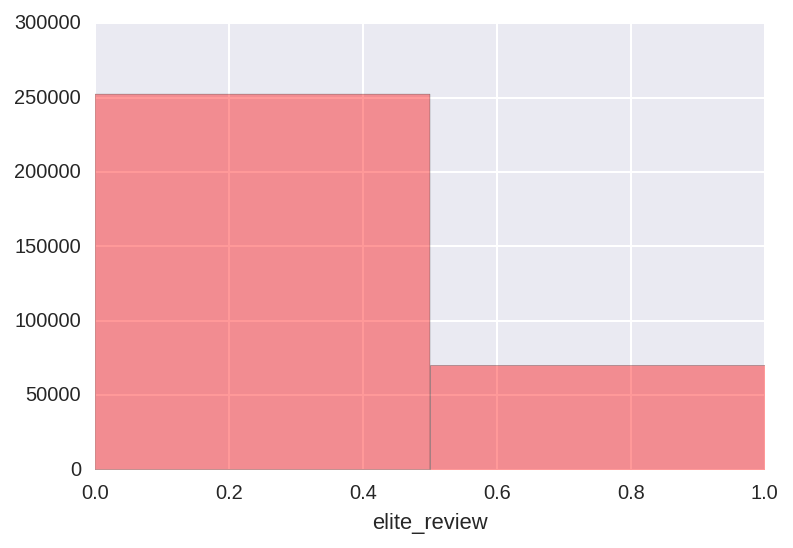

In [56]:
#histogram of meged_reviews.value_counts
import seaborn as sns

p = sns.distplot(merged_reviews['elite_review'], kde=False, bins=2, color='red')



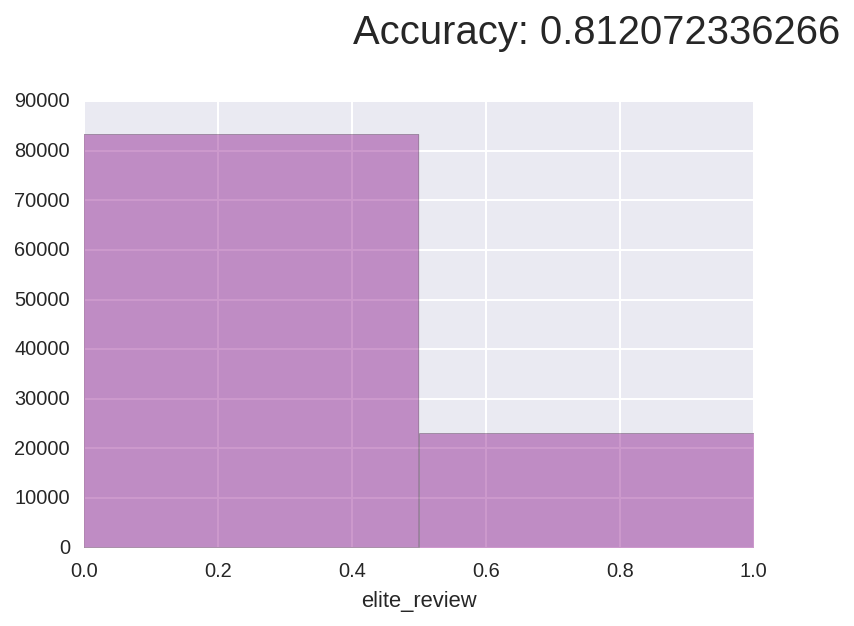

In [57]:
#histogram of TP+TN (Accuracy) for true values
p =sns.distplot(y_test, kde=False, bins=2, color='purple')

p.figure.text(1, 1, 'Accuracy: %s'%(metrics.accuracy_score(y_test, y_pred)), ha='right', fontsize=20)

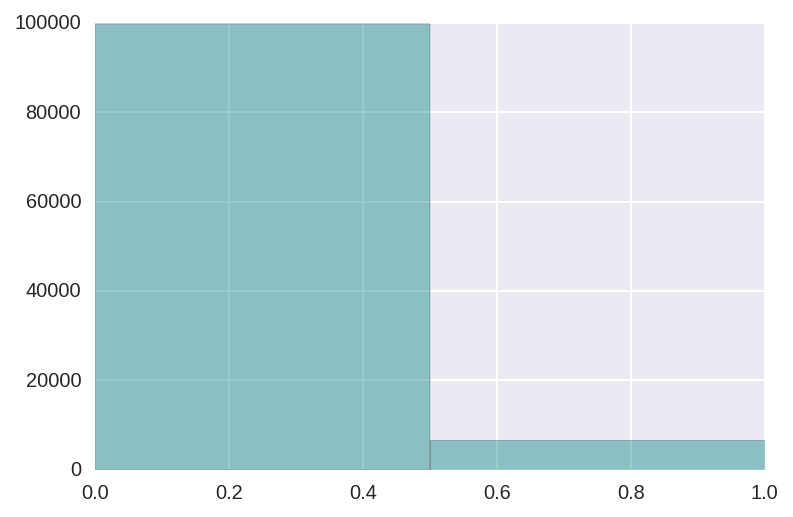

In [61]:
#histogram of TP/TN for predicted values

p = sns.distplot(y_pred, kde=False, bins=2, color='teal')

In [ ]:
"""
In summation, I was unable to test more predictors for the sake of time, however the by-review number
of votes a person recieved for being useful, cool or funny, togther, were good indicators of whether or not
a review was elite or was made by an elite user.
"""

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?